In [1]:
%matplotlib inline
from scipy import misc
from scipy.ndimage import gaussian_filter
from PIL import Image
import numpy as np
import cv2


import matplotlib.pyplot as plt

In [2]:
image = Image.open('test.png')
image_arr = np.array(image)
image_arr.shape

(389, 389, 4)

In [3]:

if image_arr.shape[-1] == 4:
    image_arr = image_arr[:,:,:-1]
    
image_arr = image_arr.astype(float)

image_arr /= 255

# Crop image Simulation Image
image_arr = image_arr[100:300, 100:300]

# Convert array to image
#image = Image.fromarray(image_arr)
  
# Display image
#image.show()

image_arr.shape,image_arr.dtype

((200, 200, 3), dtype('float64'))

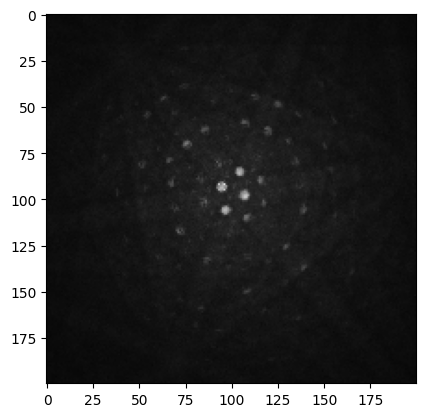

In [4]:
plt.imshow(image_arr)

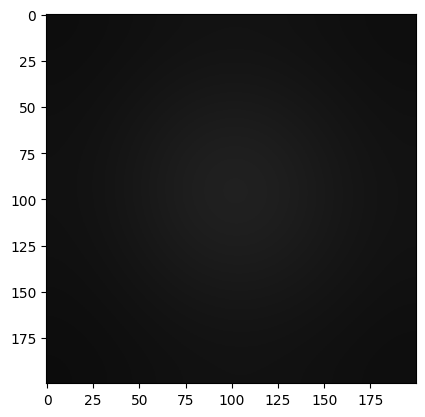

In [5]:
result = gaussian_filter(image_arr, sigma=30)
plt.imshow(result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


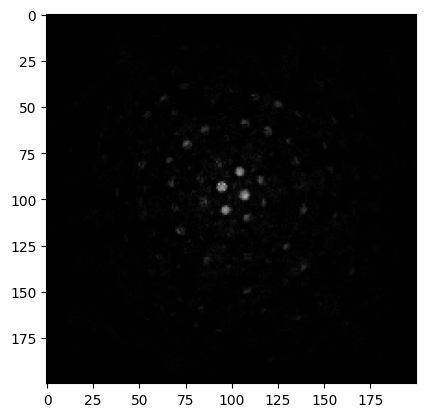

In [6]:
no_background = image_arr - result
plt.imshow(no_background, cmap = 'gray')

In [7]:
img = np.mean(no_background, axis=2)
img *= 255

(array([[200.,   0.,   0., ...,   0.,   0.,   0.],
        [200.,   0.,   0., ...,   0.,   0.,   0.],
        [200.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [200.,   0.,   0., ...,   0.,   0.,   0.],
        [200.,   0.,   0., ...,   0.,   0.,   0.],
        [200.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([-10.33422837,  10.80035189,  31.93493216,  53.06951242,
         74.20409269,  95.33867295, 116.47325322, 137.60783348,
        158.74241375, 179.87699402, 201.01157428]),
 <a list of 200 BarContainer objects>)

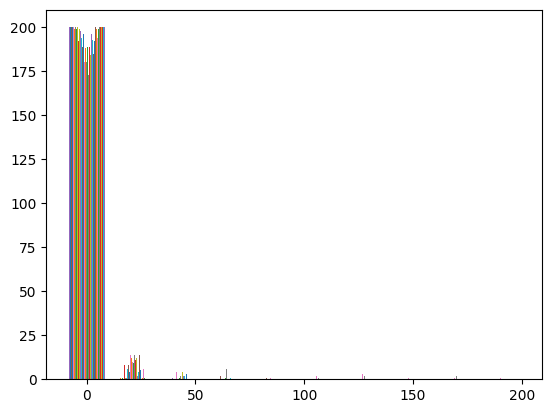

In [8]:
plt.hist(img)

threshhold = np.where(((img > -20) & (img < 20)), 255, 0)
plt.imshow(threshhold, cmap = 'gray')

threshhold = np.where(img < 20, img, 0)
plt.imshow(threshhold, cmap = 'gray')

(array([[  3.,  43., 123., ...,   0.,   0.,   0.],
        [  1.,  31., 130., ...,   0.,   0.,   0.],
        [  0.,  37., 120., ...,   0.,   0.,   0.],
        ...,
        [  0.,  56., 120., ...,   0.,   0.,   0.],
        [  0.,  65., 116., ...,   0.,   0.,   0.],
        [  3.,  74., 110., ...,   0.,   0.,   0.]]),
 array([-10.33422837,  -7.30661141,  -4.27899444,  -1.25137748,
          1.77623949,   4.80385645,   7.83147342,  10.85909039,
         13.88670735,  16.91432432,  19.94194128]),
 <a list of 200 BarContainer objects>)

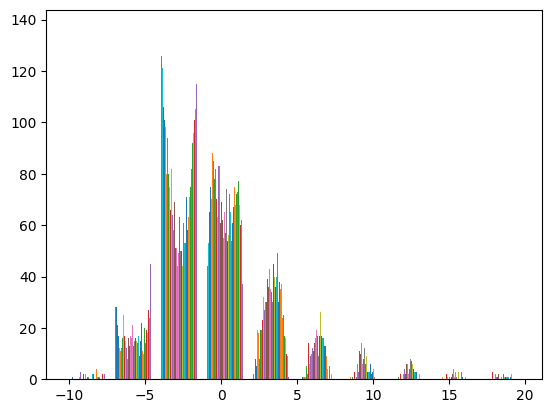

In [9]:
threshhold = np.where(img < 20, img, 0)
plt.hist(threshhold)

threshhold2 = threshhold * 10
plt.imshow(threshhold2, cmap = 'gray')


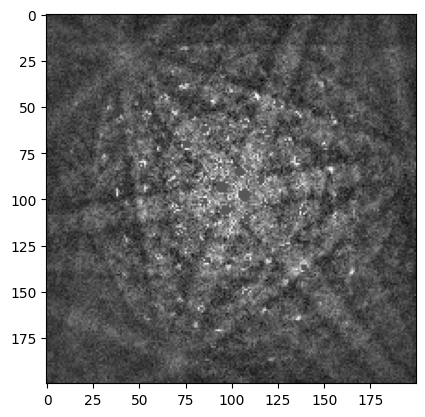

In [10]:
plt.imshow(threshhold, cmap = 'gray')